In [1]:
import numpy as np
import pandas as pd
import pandas_profiling

import time
from sklearn.preprocessing import Imputer

ModuleNotFoundError: No module named 'pandas_profiling'

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(307511, 122)

In [5]:
df.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12  

In [7]:
#pandas_profiling.ProfileReport(df)

In [6]:
# drop all columns that pandas profiling indicates that should be removed.
df = df.drop(['AMT_GOODS_PRICE', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE', 
              'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'ENTRANCES_MEDI', 
              'ENTRANCES_MODE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
              'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2',
              'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMIN_MEDI',
              'FLOORSMIN_MODE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI',
              'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 
              'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE',
              'OBS_60_CNT_SOCIAL_CIRCLE', 'REGION_RATING_CLIENT_W_CITY', 'TOTALAREA_MODE',
              'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
              axis=1)

In [7]:
df.shape

(307511, 77)

In [8]:
# Create a new function that finds missing values:
def num_missing(x):
  return sum(x.isnull())

In [9]:
# Applying for missing columns:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL 

In [10]:
# Drop columns with large numbers of missing values. These potentially could be interpreted together and combinded into
# columns that may have meaning. However that may introduce a lot more complexity and for now we have made the decisison
# to drop them.
df = df.drop(['OWN_CAR_AGE', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 
                        'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'FONDKAPREMONT_MODE',
                        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], axis=1)

In [11]:
df.shape

(307511, 65)

In [12]:
# Applying for missing columns:
print("Missing values per column:")
print(df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL             

In [13]:
df = df.drop(['EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
              'COMMONAREA_AVG'], axis=1)

In [14]:
df.shape

(307511, 59)

In [15]:
# Applying for missing columns:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_

In [16]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL               

In [18]:
# fill missing values in columns that are objects with unknown. 
df['NAME_TYPE_SUITE'].fillna('Unknown', inplace=True)
df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

In [19]:
# Applying for missing columns:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

# Applying for missing rows:
print("\nMissing values per row:")
print(df.apply(num_missing, axis=1).head())

Missing values per column:
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_

In [20]:
# Fill NaN values with the median of the column.

columns_to_impute = ['AMT_ANNUITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'OBS_30_CNT_SOCIAL_CIRCLE',
                    'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for column in columns_to_impute:
    df[column].fillna((df[column].median()), inplace=True)

In [21]:
#Applying per column:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
WEEKDAY_APPR_PRO

In [22]:
df.to_csv('imputed_cleaned_train_data.csv', sep=',')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307511 non-null float64
NAME_TYPE_SUITE                307511 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH              

# Data Exploration with PCA

We explore the relationships between features using PCA below. Specifically, we want to know if there are certain correlations among features that allows us to reduce our dimensions by combining those features into 'composite' features. Since PCA should only be applied to quantitative variables (because the numerical difference between dummy-encoded categorical variables has no real meaning in terms of linear algebraic distance), we apply PCA to a subset of our data frame that contains only non-object data types.

In [30]:
# We call notebook twice to avoid a bug.
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

In [24]:
# Pull only non-categorical columns.
dfX = df.loc[:,df.dtypes!=object]
dfY = dfX['TARGET'] # pull out target variable

# Drop ID and target from X.
dfX = dfX.drop(['SK_ID_CURR','TARGET'], 1)

# Show X columns.
dfX.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,1,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA Computation

We perform PCA using scikit-learn below. Before applying PCA, we standardize our features to have mean 0 and variance 1; this is necessary because PCA's computation of variance would give larger-scale features excessive influence on the transformation if they were not standardized.

From the below, we see that the first five principal components combined explain only 27.7% of the total variation in the data, with the largest principal component explaining just 9.02% of the variance. The output of the below cell is an array that shows the percentage of variance explained by the first five principal components.

In [25]:
# Standardize the features in the dataframe (to mean zero and standard deviation 1).
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler() # instantiate the class
dfX_std = std_sc.fit_transform(dfX) # transform the data

from sklearn.decomposition import PCA
pca = PCA()
dfX_pca = pca.fit_transform(dfX_std)

# The amount of variance explained from the first 5 principal components.
pca.explained_variance_ratio_[0:5]/np.sum(pca.explained_variance_ratio_)


array([0.09020874, 0.05468487, 0.04927756, 0.04473611, 0.03835738])

In order to increase our intuition about PCA, we also decided to implement PCA from scratch (using lower-level logic in place of the scikit-learn library). To do this, we performed the following steps.

1. We used our standardized features (with mean 0 and standard deviation 1) to compute the covariance matrix. Since our mean is 0, we were then able to apply a simple equation: (1/n-1) * np.dot(X.T, X) to compute the covariance matrix using vectorized logic. Note that n is the number of observations, and X is our features matrix with shape (number of observations, number of columns).


2. We then extracted the eigenvalues and related eigenvectors from an eigendecomposition of the covariance matrix. We did this using a simple linear algebra function (since the eigendecomposition is somewhat complex).


3. We sorted the eigenvalues (along with their related eigenvectors) in order from largest magnitude to smallest.


4. We decided to look at the top three principal components, so we concatenated the top three eigenvectors (based on their eigenvalues) vertically into a matrix. This functions as our projection matrix with shape of (number of features, number of principal components).


5. To obtain the principal components of an observation, we calculate the dot product between our observation and our projection matrix.


In [26]:
# 1. Compute covariance matrix.
cov = (1/(dfX_std.shape[0]-1)) * np.dot(dfX_std.T, dfX_std)

# 2. Perform eigendecomposition on covariance matrix.
eigenvals, eigenvecs = np.linalg.eig(cov)

# 3. Sort the eigenvectors based on the largest eigvalues.
eigenlist = [(eigenvals[i], eigenvecs[:, i]) for i in range(0, len(eigenvals))] # create a list of tuples of eigenvalue,
    # eigenvector pairs.
eigenlist.sort(key=lambda tup: tup[0], reverse=True) # sort the list

# 4. Create the projection matrix of the top three eigenvectors. The projection matrix has shape (num features, num
    # of principal components). We take the dot product between this and the feature matrix to get the principal
    # components for each observation.
proj_mat = (np.vstack((eigenlist[0][1], eigenlist[1][1], eigenlist[2][1]))).T

# 5. Transform the observations.
pca_vals = np.dot(dfX_std, proj_mat)

The below shows the top three principal components for the first 10 observations (for both the scikit-learn and our manual implementation). Since these values are the same, this shows that our manual implementation of PCA is correct.

In [27]:
print('Scikit PCA: ', dfX_pca[0:10,0:3], '\nManual PCA: ', pca_vals[0:10])

Scikit PCA:  [[ 0.48986397 -2.28777145 -0.7530691 ]
 [ 0.6007346   0.87519794  1.62004489]
 [-0.72509524 -0.64807015 -0.63724276]
 [-0.37023987 -0.13979352  0.53052381]
 [ 0.46944532  0.85738264 -1.595316  ]
 [ 0.51821268  0.31162372  1.08009989]
 [ 1.3391182   2.08006108  2.76818388]
 [ 1.62908471  0.44900821 -0.12982321]
 [-2.69072597  0.246492   -0.00617277]
 [-1.17754061  0.18423452  0.18995215]] 
Manual PCA:  [[ 0.48986397 -2.28777145 -0.7530691 ]
 [ 0.6007346   0.87519794  1.62004489]
 [-0.72509524 -0.64807015 -0.63724276]
 [-0.37023987 -0.13979352  0.53052381]
 [ 0.46944532  0.85738264 -1.595316  ]
 [ 0.51821268  0.31162372  1.08009989]
 [ 1.3391182   2.08006108  2.76818388]
 [ 1.62908471  0.44900821 -0.12982321]
 [-2.69072597  0.246492   -0.00617277]
 [-1.17754061  0.18423452  0.18995215]]


As mentioned at the beginning of the section, the top five principal components together explain only 27.7% of the variance in the dataset. Since this is only a quarter of the variance, there is some doubt about whether a graph of our principal components will be able to separate out the two classes of our response variable. Since graphs typically only allow us to plot two or three dimensions at a time, there is some constraint in how we can visually disambiguate a complex dataset (as opposed to analytically doing so).

We go ahead and plot the data based on the values of the top two principal components only. Based on the below graph, it appears that the first two principal components are not enough to separate out the response class, as there is a lot of overlap between the two classes on these two principal components. Note that we plot only a small subset of our data (based on a stratified random sample) in order not to over-crowd the graph.

<IPython.core.display.Javascript object>


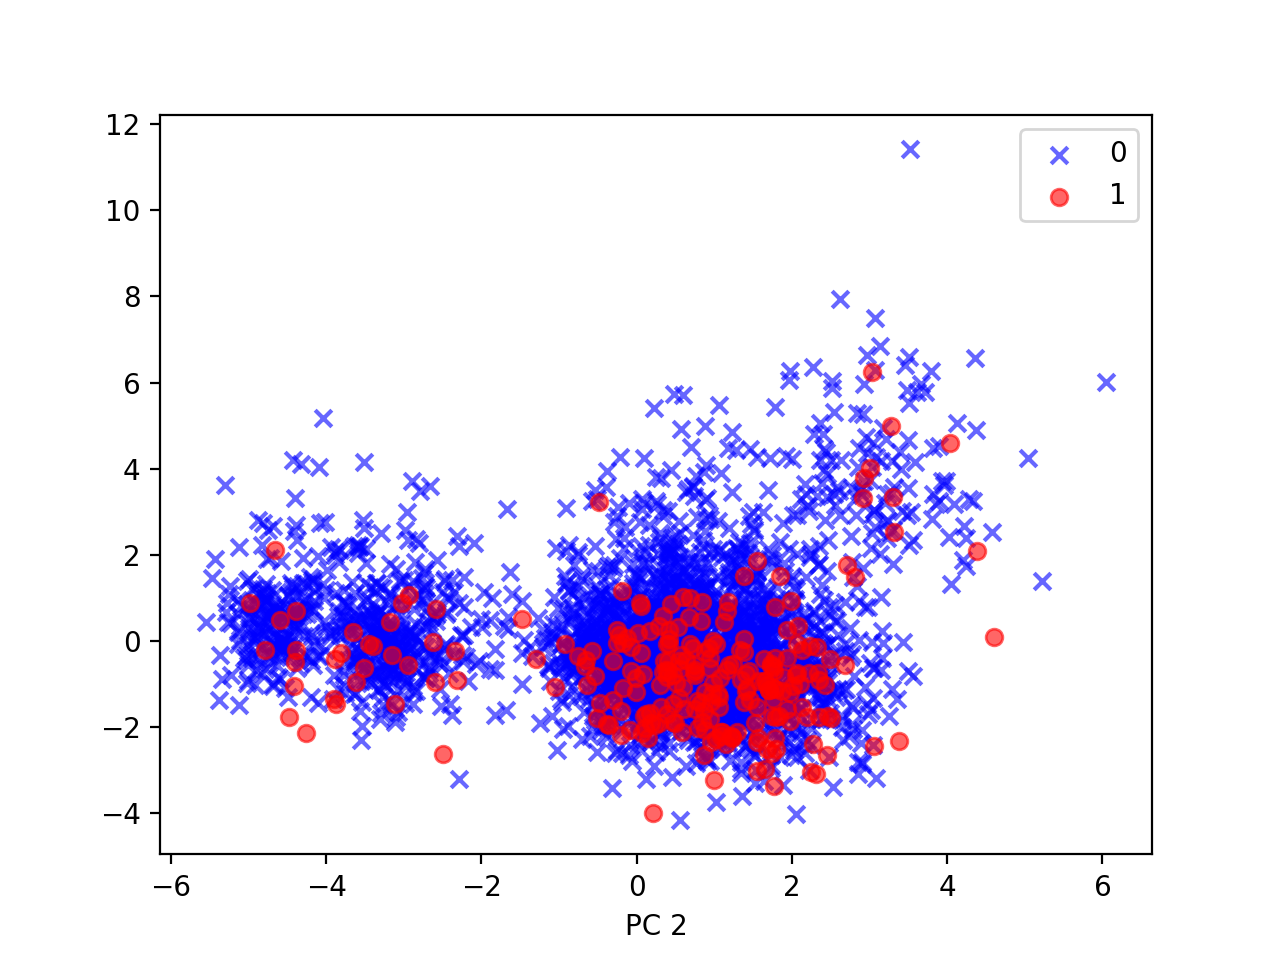

In [34]:
# In order not to over-crowd our visualization, we take a stratified random sample of points to plot in our
# visualization.
from sklearn.model_selection import train_test_split
visX_pca, otherX_pca, visY, otherY = train_test_split(dfX_pca, dfY, test_size=0.99, stratify=dfY, random_state=0)

colors = ['blue', 'red']
markers = ['x', 'o']
for i, l in enumerate(np.unique(visY)):
    plt.scatter(visX_pca[visY==l,0], visX_pca[visY==l,1], color=colors[i], marker=markers[i], alpha=0.6, label=l)
plt.xlabel('PC 1')
plt.xlabel('PC 2')
plt.legend(loc='best')

Since the top two principal components do not appear to be enough to separate out the two levels of the response variable, we go ahead and plot the third principal component in a three-dimensional plot below.

Based on the below plot, it appears there's a little more separation between the two classes, but not enough that would allow a classifier to accurately predict the target variable without concern of greatly overfitting the model.

To summarize our PCA findings, we would conclude that the dataset is complex enough that a few principal components alone are not enough to create an accurate classification model. At the very least, we would look to using categorical variables and other methods (such as polynomial or similarity features) to improve a future model that we might want to develop.

<IPython.core.display.Javascript object>


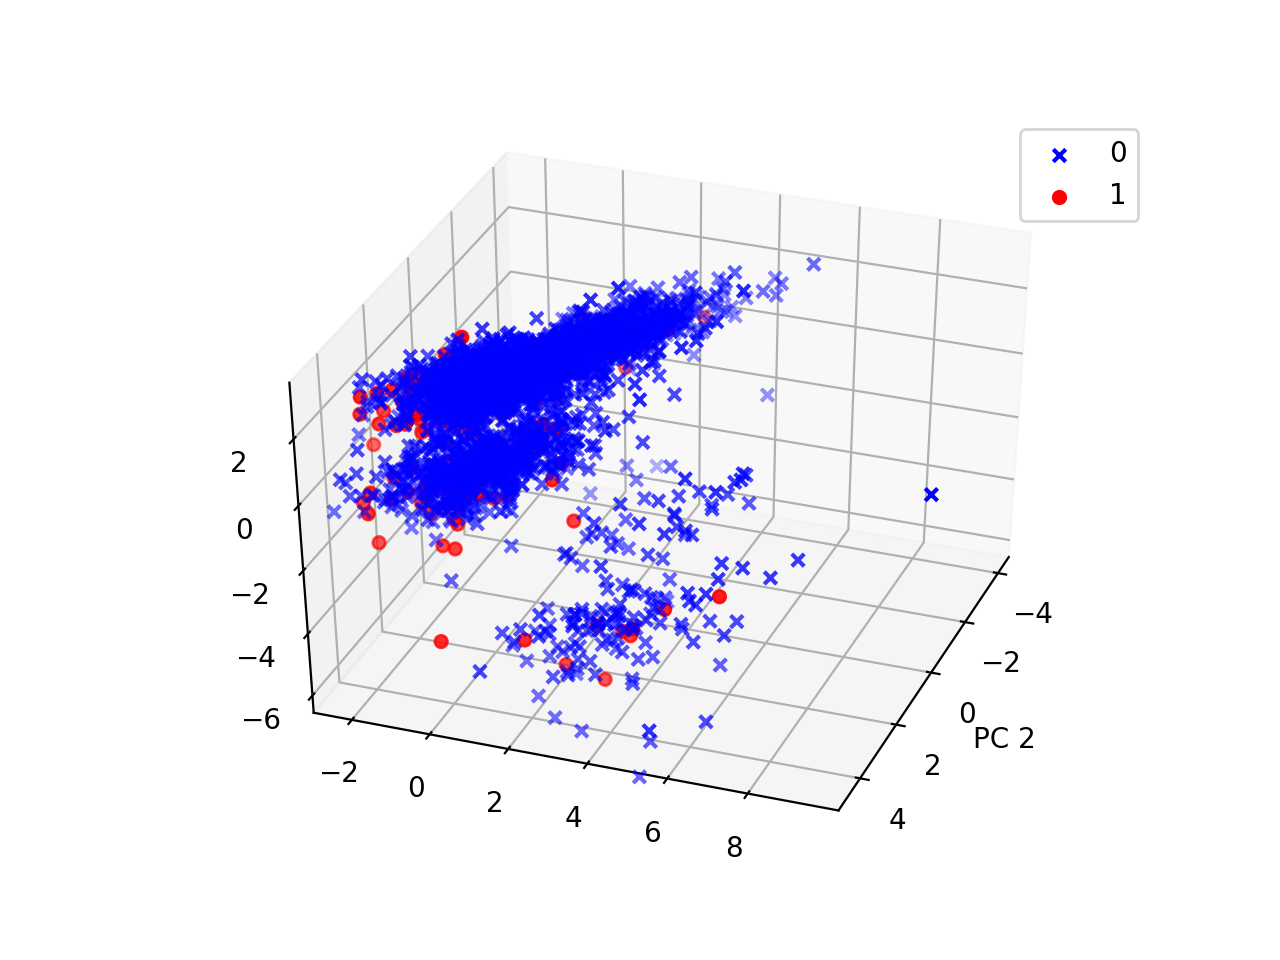

In [36]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for l, c, m in zip(np.unique(visY), colors, markers):
    ax.scatter(visX_pca[visY==l,0], visX_pca[visY==l,1], visX_pca[visY==l,2], color=c, marker=m, label=l)
plt.xlabel('PC 1')
plt.xlabel('PC 2')
plt.legend(loc='best')